In [1]:
# 导入需要的模块
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 用来绘图的，封装了matplot
# 要注意的是一旦导入了seaborn，
# matplotlib的默认作图风格就会被覆盖成seaborn的格式
import seaborn as sns       

from scipy import stats
from scipy.stats import  norm
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline  
# 为了在jupyter notebook里作图，需要用到这个命令

In [2]:
# 导入csv文件
df_train = pd.read_csv('/Users/ken/Downloads/Datawhale_Learning-master/机器学习/数据竞赛(房租预测)/数据集/train_data.csv')

In [3]:
df_train.head()

# id和communityName都可以去掉，city都是sh,也没用

,ID,area,rentType,houseType,houseFloor,totalFloor,houseToward,houseDecoration,communityName,city,...,landTotalPrice,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum,tradeTime,tradeMoney
0,100309852,68.06,未知方式,2室1厅1卫,低,16,暂无数据,其他,XQ00051,SH,...,0,0.0000,28248,614,111546,1124.0,284.0,0,2018/11/28,2000.0
1,100307942,125.55,未知方式,3室2厅2卫,中,14,暂无数据,简装,XQ00130,SH,...,0,0.0000,14823,148,157552,701.0,22.0,1,2018/12/16,2000.0
2,100307764,132.00,未知方式,3室2厅2卫,低,32,暂无数据,其他,XQ00179,SH,...,0,0.0000,77645,520,131744,57.0,20.0,1,2018/12/22,16000.0
3,100306518,57.00,未知方式,1室1厅1卫,中,17,暂无数据,精装,XQ00313,SH,...,332760000,3080.0331,8750,1665,253337,888.0,279.0,9,2018/12/21,1600.0
4,100305262,129.00,未知方式,3室2厅3卫,低,2,暂无数据,毛坯,XQ01257,SH,...,0,0.0000,800,117,125309,2038.0,480.0,0,2018/11/18,2900.0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41440 entries, 0 to 41439
Data columns (total 51 columns):
ID                    41440 non-null int64
area                  41440 non-null float64
rentType              41440 non-null object
houseType             41440 non-null object
houseFloor            41440 non-null object
totalFloor            41440 non-null int64
houseToward           41440 non-null object
houseDecoration       41440 non-null object
communityName         41440 non-null object
city                  41440 non-null object
region                41440 non-null object
plate                 41440 non-null object
buildYear             41440 non-null object
saleSecHouseNum       41440 non-null int64
subwayStationNum      41440 non-null int64
busStationNum         41440 non-null int64
interSchoolNum        41440 non-null int64
schoolNum             41440 non-null int64
privateSchoolNum      41440 non-null int64
hospitalNum           41440 non-null int64
drugStoreNum       

In [5]:
na_count = df_train.isnull().sum().sort_values(ascending=False)
na_rate = na_count / len(df_train)
na_data = pd.concat([na_count,na_rate],axis=1,keys=['count','ratio'])
na_data.head(20)

,count,ratio
uv,18,0.000434
pv,18,0.000434
tradeMoney,0,0.000000
plate,0,0.000000
gymNum,0,0.000000
drugStoreNum,0,0.000000
hospitalNum,0,0.000000
privateSchoolNum,0,0.000000
schoolNum,0,0.000000
interSchoolNum,0,0.000000


In [6]:
df_train['tradeMoney'].describe()

count    4.144000e+04
mean     8.837074e+03
std      5.514287e+05
min      0.000000e+00
25%      2.800000e+03
50%      4.000000e+03
75%      5.500000e+03
max      1.000000e+08
Name: tradeMoney, dtype: float64

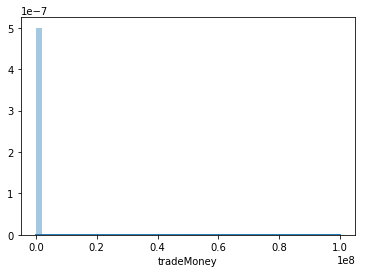

In [7]:
sns.distplot(df_train['tradeMoney']);

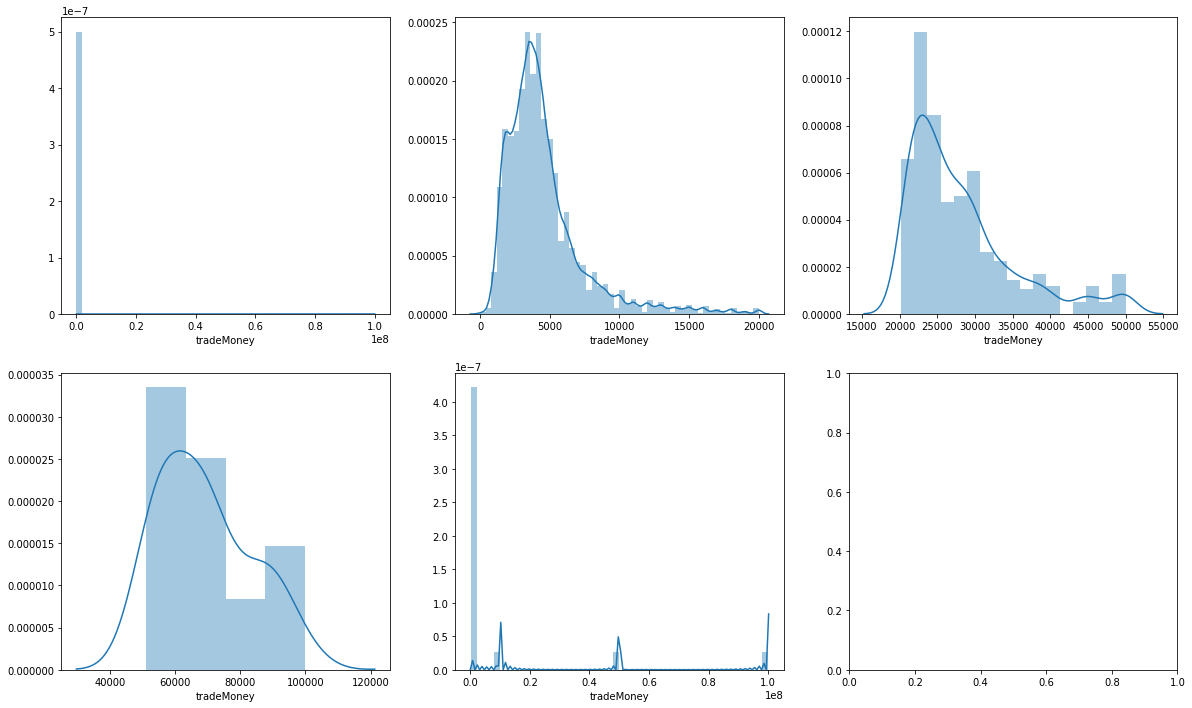

In [10]:
fig,axes = plt.subplots(2,3,figsize=(20,5))
fig.set_size_inches(20,12)
sns.distplot(df_train['tradeMoney'],ax=axes[0][0])
sns.distplot(df_train[(df_train['tradeMoney']<=20000)]['tradeMoney'],ax=axes[0][1])
sns.distplot(df_train[(df_train['tradeMoney']>20000)&(df_train['tradeMoney']<=50000)]['tradeMoney'],ax=axes[0][2])
sns.distplot(df_train[(df_train['tradeMoney']>50000)&(df_train['tradeMoney']<=100000)]['tradeMoney'],ax=axes[1][0])
sns.distplot(df_train[(df_train['tradeMoney']>100000)]['tradeMoney'],ax=axes[1][1])

In [13]:
print("money<=10000",len(df_train[(df_train['tradeMoney']<=10000)]['tradeMoney']))
print("10000<money<=20000",len(df_train[(df_train['tradeMoney']>10000)&(df_train['tradeMoney']<=20000)]['tradeMoney']))
print("20000<money<=50000",len(df_train[(df_train['tradeMoney']>20000)&(df_train['tradeMoney']<=50000)]['tradeMoney']))
print("50000<money<=100000",len(df_train[(df_train['tradeMoney']>50000)&(df_train['tradeMoney']<=100000)]['tradeMoney']))
print("100000<money",len(df_train[(df_train['tradeMoney']>100000)]['tradeMoney']))

money<=10000 38964
10000<money<=20000 1985
20000<money<=50000 433
50000<money<=100000 39
100000<money 19


In [15]:
# 筛选数据
df_train = df_train[df_train['tradeMoney'] < 50000]

In [16]:
print("Skewness: %f" % df_train['tradeMoney'].skew())
print("Kurtosis: %f" % df_train['tradeMoney'].kurt())

Skewness: 3.767785
Kurtosis: 22.484483


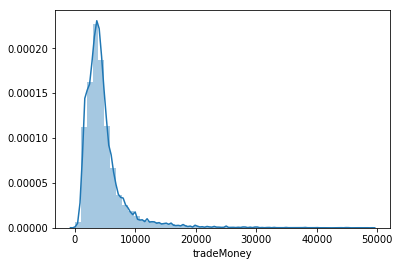

In [17]:
sns.distplot(df_train['tradeMoney']);

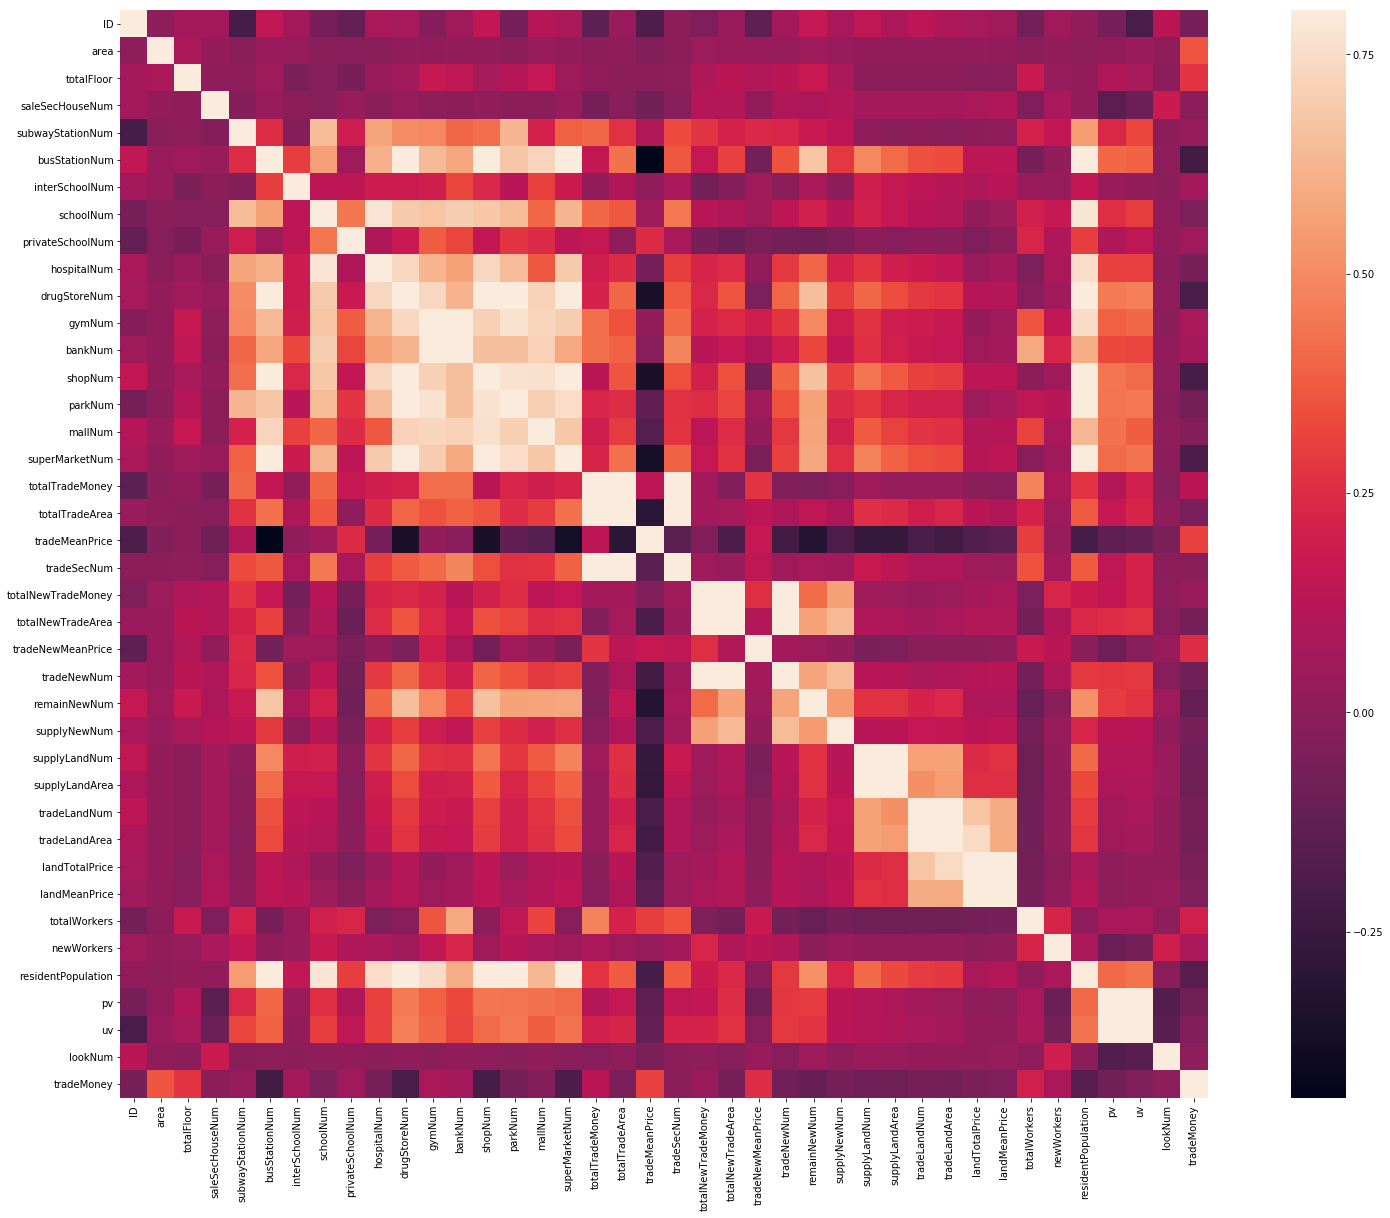

In [18]:
# 热图
# seaborn库的.heatmap() 方法 
# 协方差矩阵热图，颜色越深代表相关性越强
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corrmat, vmax=.8, square=True);

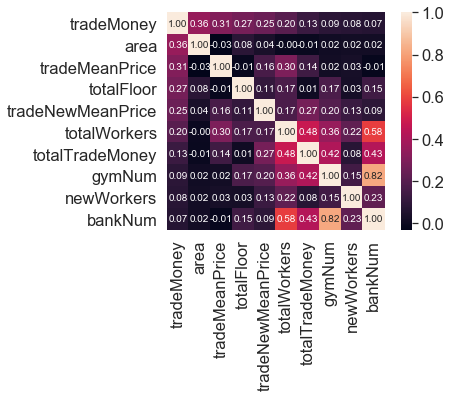

In [19]:
# 选取与tradeMoney相关系数最高的10个特征作热图，显示相关系数
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'tradeMoney')['tradeMoney'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [20]:
# 离群点分析

# 单变量分析

# 首先用标准化（标准化不会改变数据相对分布的特性）把数据转变成正态分布，分别查看最大和最小的十个值
saleprice_scaled = StandardScaler().fit_transform(df_train['tradeMoney'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.28205552]
 [-1.28205552]
 [-1.28205552]
 [-1.28205552]
 [-1.28205552]
 [-1.28205552]
 [-1.28205552]
 [-1.28205552]
 [-1.28205552]
 [-1.25520621]]

outer range (high) of the distribution:
[[10.80013274]
 [10.80013274]
 [10.80013274]
 [10.80013274]
 [11.06862581]
 [11.30651067]
 [11.60561196]
 [11.60561196]
 [11.60561196]
 [11.83866394]]


In [ ]:
# 可以发现，Low range值偏离原点并且都比较相近，High range离远点较远，18 90 181很可能是异常值

In [23]:
# 基本都是小于1000平方，有5个异常点。需要看一下

df_train.loc[df_train['area']< 5]

,ID,area,rentType,houseType,houseFloor,totalFloor,houseToward,houseDecoration,communityName,city,...,landTotalPrice,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum,tradeTime,tradeMoney
1407,100106848,4.80,合租,4室1厅1卫,中,24,西,精装,XQ00187,SH,...,0,0.0,77645,0,131744,4555.0,652.0,0,2018/3/15,2260.0
1439,100077923,3.20,合租,3室1厅1卫,低,6,西,精装,XQ03099,SH,...,0,0.0,5622,0,210903,23976.0,2544.0,0,2018/3/24,1230.0
8142,100266661,1.00,整租,3室2厅1卫,低,14,南,精装,XQ01410,SH,...,0,0.0,19615,0,274232,33974.0,2393.0,0,2018/2/23,5850.0
38783,100019122,2.63,合租,3室1厅1卫,高,28,东南,精装,XQ01104,SH,...,0,0.0,855400,0,161754,22185.0,1971.0,0,2018/2/25,3660.0


In [24]:
df_train.loc[df_train['area']>14000]

,ID,area,rentType,houseType,houseFloor,totalFloor,houseToward,houseDecoration,communityName,city,...,landTotalPrice,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum,tradeTime,tradeMoney
2752,100092253,15055.0,未知方式,4室2厅2卫,高,17,南北,其他,XQ03213,SH,...,0,0.0,3162,0,52091,5966.0,563.0,0,2018/2/5,11200.0


In [26]:
df_train = df_train[(df_train['area']>5)&(df_train['area']<14000)]